In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [61]:
df=pd.read_csv("cats_vs_dogs.csv")
df.head()

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


In [63]:
print(df.columns)

Index(['Unnamed: 0', 'state', 'n_households', 'percent_pet_households',
       'n_pet_households', 'percent_dog_owners', 'n_dog_households',
       'avg_dogs_per_household', 'dog_population', 'percent_cat_owners',
       'n_cat_households', 'avg_cats_per_household', 'cat_population'],
      dtype='object')


In [65]:
df = df.drop(columns=['Unnamed: 0'])
df

,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
0,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191
5,Connecticut,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796
6,Delaware,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187
7,District of Columbia,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63
8,Florida,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375
9,Georgia,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162


In [67]:
X = df[['n_households', 'percent_pet_households', 'n_pet_households', 
        'percent_dog_owners', 'n_dog_households', 'avg_dogs_per_household', 
        'dog_population', 'percent_cat_owners', 'n_cat_households', 
        'avg_cats_per_household', 'cat_population']]

df['dog_to_cat_ratio'] = df['dog_population'] / df['cat_population']
df['has_more_dogs'] = df['dog_to_cat_ratio'] > 1 

y = df['has_more_dogs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


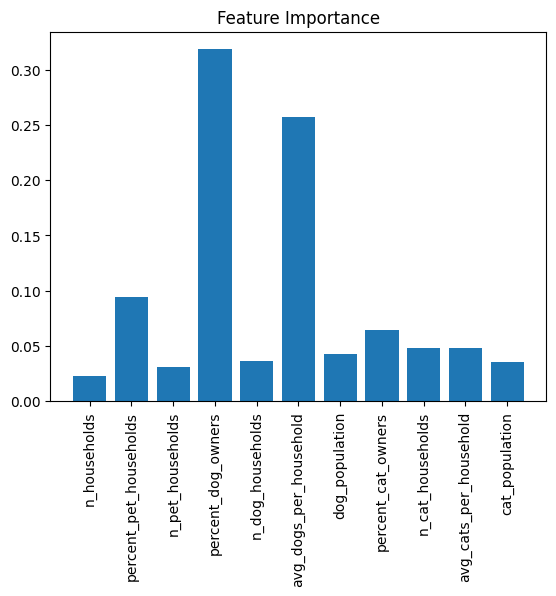

In [71]:
importances = model.feature_importances_
indices = range(len(importances))

plt.bar(indices, importances)
plt.xticks(indices, X.columns, rotation=90)
plt.title('Feature Importance')
plt.show()